In [1]:
import numpy as np

import scipy.io.wavfile as wavfile
from scipy import signal

import time
import os

import ffmpeg

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

import glob

## Initialization
import IPython.display as ipd
import librosa.display

In [2]:
def plot_waveform(data, start, end):
    '''
    Signal Visualization
    
    Parameters:
    data (nd.array): the data we want to visualize
    start (int): start range
    end (int): end range

    Returns:
    None: just shows the graph  
    
    '''
    data = data[start:end]
    plt.plot(data)
    plt.ylabel('amplitude')
    plt.xlabel('samples')
    plt.show()
    return None

In [3]:
# def triangle(length, amplitude):
#     '''
#     Generate periodic triangular signals
    
#     Parameters:
#         length (int) - the length of output signal
#         amplitude (int or float in general) - amplitude of output signal
        
#     Returns:
#         list (of floats) - triangular signal
#     '''
#     section = length // 4
#     for direction in (1, -1):
#         for i in range(section):
#             yield i * (amplitude / section) * direction
#         for i in range(section):
#             yield (amplitude - (i * (amplitude / section))) * direction

In [4]:
sampling_rate = 16000 # 8000 hz  F_s
omega = np.pi / 10 # radians per sample (pysical_frequency = sampling_rate * omega / (2*np.pi))
amplitude = 1000
N = 3 * sampling_rate # lenght of signal

In [5]:
coef_no = int(N / 2) + 1 # amount of independent coefficients
samples = np.array(list(range(N))) # sample indices 
freqs = np.array(list(range(coef_no))) * sampling_rate / N # frequencies of current signal spectrum

In [6]:
t = np.linspace(0, N, N)
# omega = 2 * np.pi
omega = np.pi / 10
triangle_sample = signal.sawtooth(omega * t * N, 0.5)

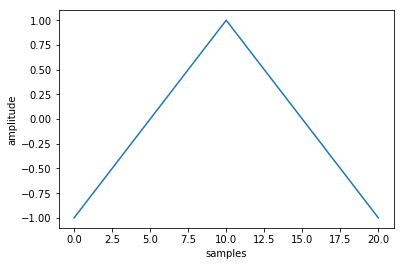

In [7]:
plot_waveform(triangle_sample, 0, 21)

In [8]:
ipd.Audio(triangle_sample, rate=sampling_rate)

In [9]:
coefs_sinusoid = np.fft.rfft(triangle_sample) # DFT coefs for 0, 1, ..., floor(N/2) base vectors
amplitude_spectr = np.abs(coefs_sinusoid)
db_spectr = 10*np.log10(amplitude_spectr + 1)

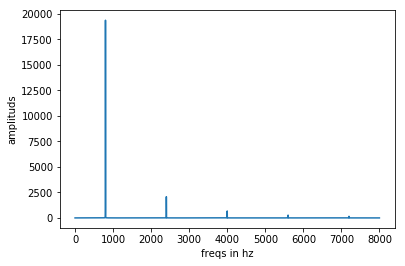

In [10]:
plt.plot(freqs, amplitude_spectr)
plt.xlabel('freqs in hz')
plt.ylabel('amplituds')
plt.show()

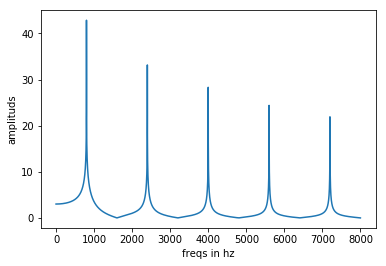

In [11]:
plt.plot(freqs, db_spectr)
plt.xlabel('freqs in hz')
plt.ylabel('amplituds')
plt.show()